In [2]:
import numpy as np
import os

suf = ["1204_201132", "1205_074135", "1222_230658"]
data_root = "C:/Users/20878/221Project/HAM10K/tmp/HAM10000"
img_title = "HAM10000"
n_classes = 7
ec_list = {"0":[], "1":[], "2":[]}
sps_avg_list = {"0":[], "1":[], "2":[]}
fsc_list = {"0":[], "1":[], "2":[]}
ssc_list = {"0":[], "1":[], "2":[]}

for i in range(3):
    ec_list[f"{i}"] = np.load(os.path.join(data_root, suf[i], "emp_cover_raps.npy"))
    sps_avg_list[f"{i}"] = np.load(os.path.join(data_root, suf[i], "sps_raps.npy"))
    fsc_list[f"{i}"] = np.load(os.path.join(data_root, suf[i], "fsc_raps.npy"))
    ssc_list[f"{i}"] = np.load(os.path.join(data_root, suf[i], "ssc_raps.npy"))

In [3]:
import pandas as pd
def reshape2long(data, mapping = {"0": "LogitRegr", "1": "InceptionV3", "2": "FixCaps"}):
    df = pd.DataFrame([(key, value) for key, values in data.items() for value in values], columns=["Model", "Value"])
    df["Model"] = df["Model"].replace(mapping)
    return df

ec_df = reshape2long(ec_list)
sps_avg_df = reshape2long(sps_avg_list)
fsc_df = reshape2long(fsc_list)
ssc_df = reshape2long(ssc_list)

C:\Users\20878\AppData\Local\Temp\ipykernel_47860\2908591568.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y="Value", data=data, palette="Set2", showmeans=kwargs["showmeans"])


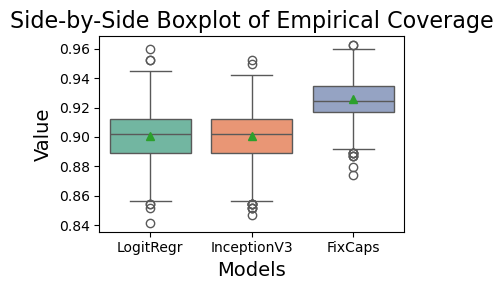

C:\Users\20878\AppData\Local\Temp\ipykernel_47860\2908591568.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y="Value", data=data, palette="Set2")


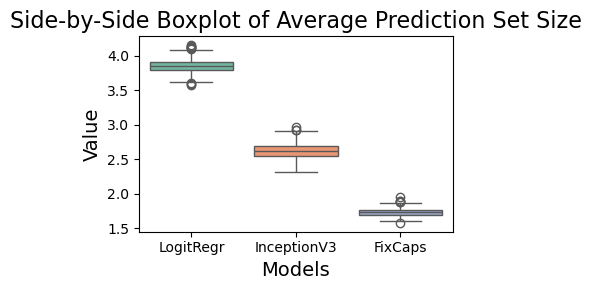

C:\Users\20878\AppData\Local\Temp\ipykernel_47860\2908591568.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y="Value", data=data, palette="Set2")


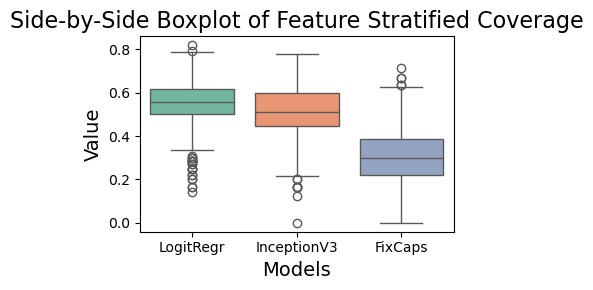

C:\Users\20878\AppData\Local\Temp\ipykernel_47860\2908591568.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y="Value", data=data, palette="Set2")


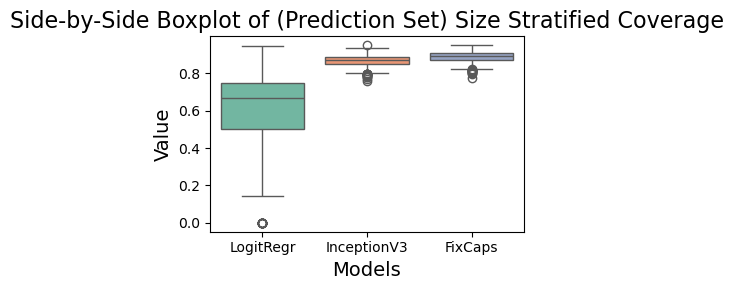

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Create the boxplot
def boxplot_draw(data, name, **kwargs):
    plt.figure(figsize=(4, 3))
    if "showmeans" in kwargs:
        sns.boxplot(x="Model", y="Value", data=data, palette="Set2", showmeans=kwargs["showmeans"])
    else:
        sns.boxplot(x="Model", y="Value", data=data, palette="Set2")

    # Add labels and title
    plt.title("Side-by-Side Boxplot of " + name, fontsize=16)
    plt.xlabel("Models", fontsize=14)
    plt.ylabel("Value", fontsize=14)

    # Show the plot
    plt.tight_layout()
    plt.show()
boxplot_draw(ec_df, "Empirical Coverage", showmeans=True)
boxplot_draw(sps_avg_df, "Average Prediction Set Size")
boxplot_draw(fsc_df, "Feature Stratified Coverage")
boxplot_draw(ssc_df, "(Prediction Set) Size Stratified Coverage")